In [2]:
#import necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

#download Apple price data into DataFrame
apple = data.DataReader('AAPL', 'yahoo',start='1/1/2000')

#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (apple.index[-1] - apple.index[0]).days
cagr = ((((apple['Adj Close'][-1]) / apple['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr

#create a series of percentage returns and calculate 
#the annual volatility of returns
apple['Returns'] = apple['Adj Close'].pct_change()
vol = apple['Returns'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 25.679999999999996%
Annual Volatility = 41.39%


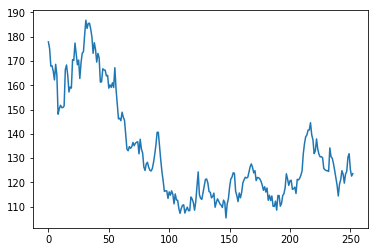

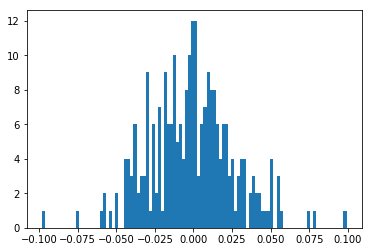

In [3]:
#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility

#create list of daily returns using random normal distribution
daily_returns=np.random.normal((mu/T),vol/math.sqrt(T),T)+1

#set starting price and create price series generated by above random daily returns
price_list = [S]

for x in daily_returns:
    price_list.append(price_list[-1]*x)

#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

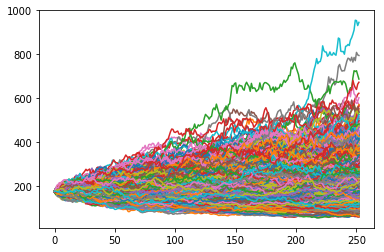

In [4]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility

#choose number of runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)

#show the plot of multiple price series created above
plt.show()

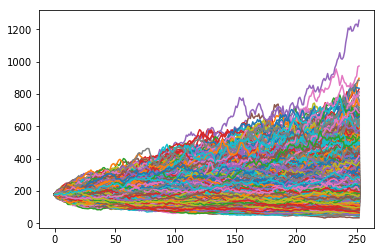

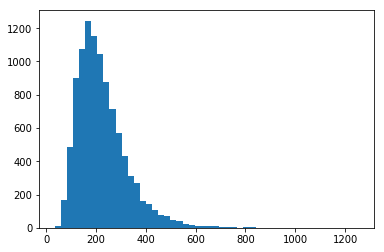

In [5]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

#set up empty list to hold our ending values for each simulated price series
result = []

#Define Variables
S = apple['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.2309 #Return
vol = 0.4259 #Volatility

#choose number of runs to simulate - I have chosen 10,000
for i in range(10000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
    
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
    
    for x in daily_returns:
        price_list.append(price_list[-1]*x)

    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
    
    #append the ending value of each simulated run to the empty list we created at the beginning
    result.append(price_list[-1])

#show the plot of multiple price series created above
plt.show()

#create histogram of ending stock values for our mutliple simulations
plt.hist(result,bins=50)
plt.show()

In [6]:
#use numpy mean function to calculate the mean of the result
print(round(np.mean(result),2))

223.83


In [7]:
print("5% quantile =",np.percentile(result,5))
print("95% quantile =",np.percentile(result,95))

5% quantile = 101.53280259880903
95% quantile = 414.5749313476342


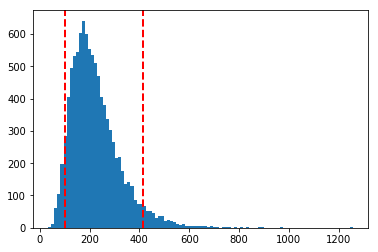

In [8]:
plt.hist(result,bins=100)
plt.axvline(np.percentile(result,5), color='r', linestyle='dashed', linewidth=2)
plt.axvline(np.percentile(result,95), color='r', linestyle='dashed', linewidth=2)
plt.show()